In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import json

In [3]:
resnet50 = torchvision.models.resnet50(pretrained=True)
resnet50.eval();
model = resnet50

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/app/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [7]:
#imagenet = torchvision.datasets.ImageNet('/app/data/imagenet/2012', split='train')

imagenet_train_ds = torchvision.datasets.ImageFolder("/app/data/imagenet/2012/T/train",
                                                     torchvision.transforms.Compose([
                                                     torchvision.transforms.ToTensor(),
                                                     torchvision.transforms.Resize((224, 224)),
                                                     ]))
                                            #torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
imagenet_dl = torch.utils.data.DataLoader(imagenet_train_ds, batch_size=10)

In [1]:
inet_images = next(iter(imagenet_dl))[0]
for i in range(10):
    plt.figure()
    img = inet_images[i]
    print(img.shape)
    imshow(img)
    print(class_id_to_label(class_id))

NameError: name 'imagenet_dl' is not defined

In [11]:
def imshow(img_tensor):
    plt.imshow(img_tensor.permute(1, 2, 0)/3 + 0.5)

with open('./resources/imagenet-simple-labels.json') as f:
    labels = json.load(f)
    
def class_id_to_label(i):
    return labels[i]

In [12]:
def lemon_transforms():
    max_translate_factor = 0.06 
    ts = [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.RandomRotation(180, fill=1.0),
        # Do rotation first so that we have more control over the center position.
        torchvision.transforms.RandomAffine(degrees=0, 
                                            translate=(max_translate_factor, 
                                                       max_translate_factor),
                                           fill=1.0),
        torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        torchvision.transforms.Resize((224, 224))]
    return torchvision.transforms.Compose(ts)

## Lemon to orange
Original lemon image:
![lemon](resources/lemons/1/lemon_centered_padded.jpg)
Edited with orange color:
![lemon](resources/oranges/1/orange_centered_padded.jpg)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([951]), lemon


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([951]), lemon


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([951]), lemon


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([950]), orange


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([951]), lemon


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([951]), lemon


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([951]), lemon


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([950]), orange


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([951]), lemon


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([951]), lemon


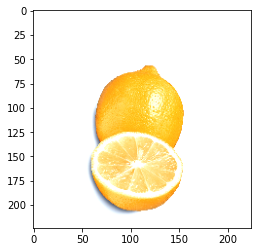

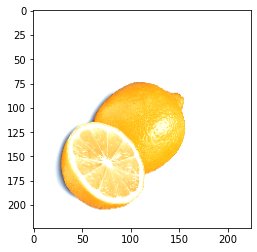

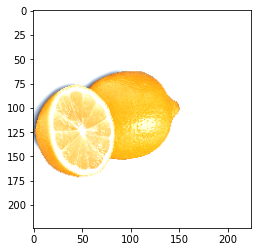

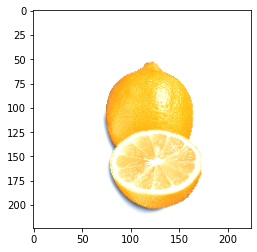

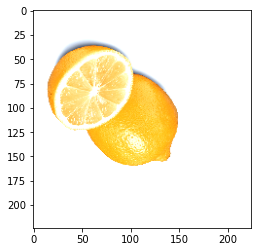

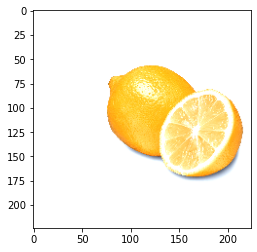

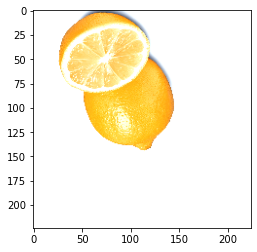

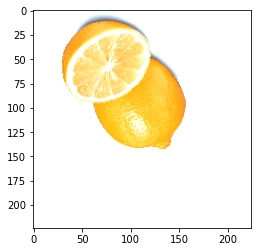

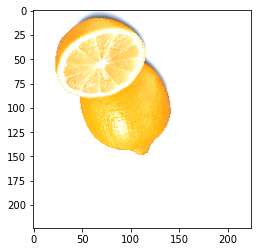

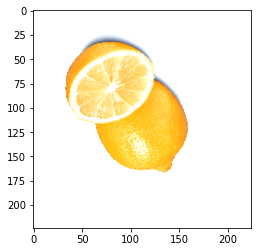

In [15]:
lemon_ds = torchvision.datasets.ImageFolder('./resources/oranges/', lemon_transforms())
dl = torch.utils.data.DataLoader(lemon_ds, batch_size=1)
for i in range(10):
    plt.figure()
    img = next(iter(dl))[0]
    class_id = torch.argmax(model.forward(img), dim=1)
    imshow(img[0])
    print(f'{class_id}, {class_id_to_label(class_id)}')
